<a href="https://colab.research.google.com/github/Jyothiswaroopr/FUTURE_DS_01/blob/main/customer_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install python-docx
import pandas as pd
import nltk
import re
import docx
from textblob import TextBlob


In [ ]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


!kaggle datasets download -d bittlingmayer/amazonreviews

!unzip amazonreviews.zip



In [ ]:
import bz2

# Decompress a .bz2 file
with bz2.BZ2File("train.ft.txt.bz2", "rb") as file, open("file.txt", "wb") as output:
    output.write(file.read())


In [ ]:
file_path = "/content/train.ft.txt"
def extract_reviews(file_path):
  with open(file_path, 'r', encoding='utf-8') as file:
    content = file.read()
    reviews = re.findall(r'__label__\d+\s(.*?)(?=__label__\d+|$)', content, re.DOTALL)
    return [review.strip() for review in reviews]
def analyze_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"


file_path = "/content/train.ft.txt"
reviews = extract_reviews(file_path)


results = [(review, analyze_sentiment(review)) for review in reviews]

for review, sentiment in results:
    print(f"Review: {review}\nSentiment: {sentiment}\n")

In [ ]:

df = pd.DataFrame(results, columns=["Review", "Sentiment"])

csv_path = "/content/reviews_sentiment.csv"
df.to_csv(csv_path, index=False, encoding="utf-8")

print(f"CSV file saved at: {csv_path}")


In [ ]:
df.head()

,Review,Sentiment
0,Valuable Addition: The card was very easy to i...,Positive
1,You can get better: I was ready to bash this b...,Positive
2,One Step Closer to Mastering Excel: This is a ...,Positive
3,A great book for really getting into Excel: Mo...,Positive
4,Found what I needed first time digging: I was ...,Positive


In [ ]:
df.isnull().sum()

,0
Review,0
Sentiment,0


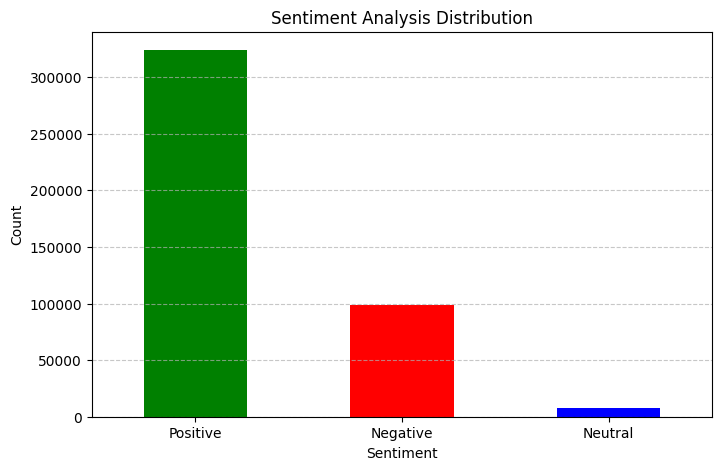

In [ ]:

import matplotlib.pyplot as plt

sentiment_counts = df["Sentiment"].value_counts()

plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind="bar", color=["green", "red", "blue"])


plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Analysis Distribution")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()
